In [2]:
import numpy as np
import networkx as nx
import random
import warnings
from gensim.models import Word2Vec
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
import community as comm

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
graphfile = 'cora.txt'
labelfile = 'cora.nodes.labels'
G = nx.read_edgelist(graphfile, nodetype=None)
G = G.to_directed()
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())

Number of nodes:  2708
Number of edges:  10556


Number of nodes:  2708
Number of edges:  10556
Learning embedding vectors...
Learning embedding vectors done!


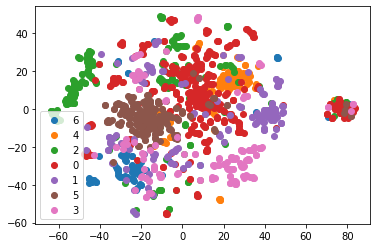

Learning embedding vectors...
Learning embedding vectors done!


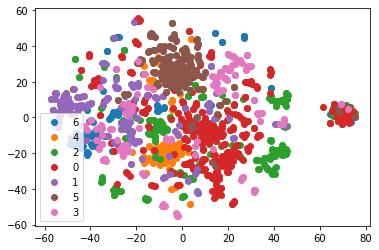

Training classifier using 5.00% nodes...
-------------------
{'acc': 0.6557886557886557}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.7136997538966365}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.735239852398524}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.7763713080168776}
-------------------
Training classifier using 40.00% nodes...
-------------------
{'acc': 0.7761377613776138}
-------------------
Training classifier using 50.00% nodes...
-------------------
{'acc': 0.7813884785819794}
-------------------
Training classifier using 60.00% nodes...
-------------------
{'acc': 0.7730627306273062}
-------------------
Training classifier using 70.00% nodes...
-------------------
{'acc': 0.7813267813267813}
-------------------
Training classifier using 80.00% nodes...
-------------------
{'acc': 0.7785977859778598}
-------------------
Number of cl

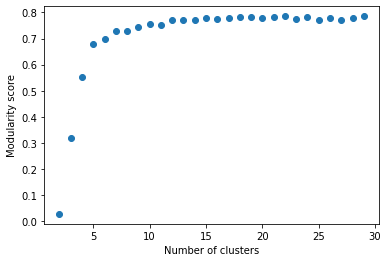

Link predictions: 0.05 :Accuracy: 0.5523980456675641
Link predictions: 0.1 :Accuracy: 0.5494158509630566
Link predictions: 0.2 :Accuracy: 0.5693309650680877
Link predictions: 0.3 :Accuracy: 0.5788903924221922
Link predictions: 0.4 :Accuracy: 0.579096937164509
Link predictions: 0.5 :Accuracy: 0.5740810913224706
Link predictions: 0.6 :Accuracy: 0.5676059673218091
Link predictions: 0.7 :Accuracy: 0.5822544995263657
Link predictions: 0.8 :Accuracy: 0.5852272727272727


In [4]:
%run prediction.ipynb

In [5]:
G1 = G.to_undirected()
# converting node labes to integers for indexing in modularity computation 
G1 = nx.relabel_nodes(G1, lambda x: int(x)-1)

In [6]:
def similarity_walk(G, num_walks, walk_length, p):
    nodes = list(G.nodes())
    clustering_coefficients = {node: nx.clustering(G, node) for node in nodes}
    walks = []

    def similar_clustering_coefficient(u, v):
        return abs(clustering_coefficients[u] - clustering_coefficients[v]) < 0.1

    for _ in range(num_walks):
        for v in nodes:
            walk = [v]
            while len(walk) < walk_length:
                cur = walk[-1]
                cur_nbrs = set(G.neighbors(cur))

                if random.uniform(0, 1) < p and cur_nbrs:
                    walk.append(random.choice(list(cur_nbrs)))
                else:
                    sim_nodes = [n for n in nodes if n != cur and similar_clustering_coefficient(cur, n)]
                    
                    if sim_nodes:
                        walk.append(random.choice(sim_nodes))
                    else:
                        break
            walks.append(walk)
    return walks

For p value as  {0}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.1794871794871795}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.2280557834290402}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.23154981549815498}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.23523206751054854}
-------------------
Training classifier using 40.00% nodes...
-------------------
{'acc': 0.24231242312423124}
-------------------
Training classifier using 50.00% nodes...
-------------------
{'acc': 0.22895125553914328}
-------------------
Training classifier using 60.00% nodes...
-------------------
{'acc': 0.22878228782287824}
-------------------
Training classifier using 70.00% nodes...
-------------------
{'acc': 0.2628992628992629}
-------------------
Training classifier using 80.00% 

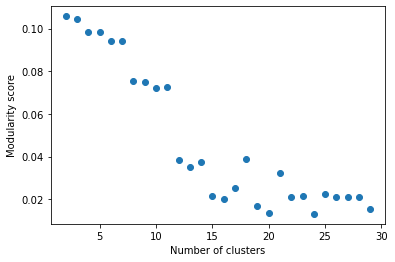

Link predictions: 0.05 :Accuracy: 0.5368431548509323
Link predictions: 0.1 :Accuracy: 0.5488895905694138
Link predictions: 0.2 :Accuracy: 0.5650680876258141
Link predictions: 0.3 :Accuracy: 0.5698240866035182
Link predictions: 0.4 :Accuracy: 0.575307862330281
Link predictions: 0.5 :Accuracy: 0.5818491852974612
Link predictions: 0.6 :Accuracy: 0.5747099218565002
Link predictions: 0.7 :Accuracy: 0.5727818124407957
Link predictions: 0.8 :Accuracy: 0.5918560606060606
For p value as  {0.2}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.3084693084693085}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.38720262510254305}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.48154981549815495}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.5453586497890295}
-------------------
Traini

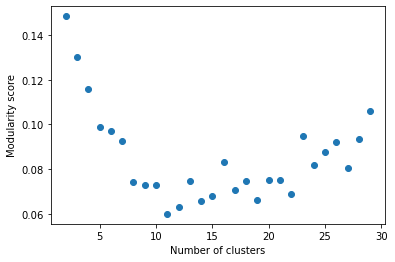

Link predictions: 0.05 :Accuracy: 0.5593778043673348
Link predictions: 0.1 :Accuracy: 0.5580465214187981
Link predictions: 0.2 :Accuracy: 0.5705150976909413
Link predictions: 0.3 :Accuracy: 0.5638700947225981
Link predictions: 0.4 :Accuracy: 0.5751499842121882
Link predictions: 0.5 :Accuracy: 0.5778704054566124
Link predictions: 0.6 :Accuracy: 0.5846554582050675
Link predictions: 0.7 :Accuracy: 0.590464161667193
Link predictions: 0.8 :Accuracy: 0.5847537878787878
For p value as  {0.5}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.40093240093240096}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.4938474159146842}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.5857933579335793}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.6550632911392406}
-------------------
Trainin

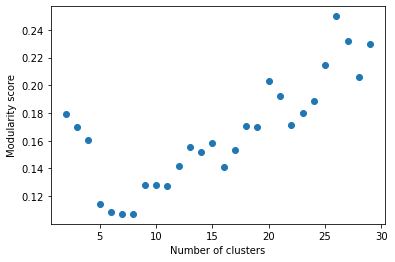

Link predictions: 0.05 :Accuracy: 0.5626682620400838
Link predictions: 0.1 :Accuracy: 0.5569940006315125
Link predictions: 0.2 :Accuracy: 0.5810538780343398
Link predictions: 0.3 :Accuracy: 0.5805142083897158
Link predictions: 0.4 :Accuracy: 0.5877802336596147
Link predictions: 0.5 :Accuracy: 0.5803334596438045
Link predictions: 0.6 :Accuracy: 0.5877338385034335
Link predictions: 0.7 :Accuracy: 0.58193874329018
Link predictions: 0.8 :Accuracy: 0.5809659090909091
For p value as  {0.8}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.5081585081585082}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.593929450369155}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.665129151291513}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.7088607594936709}
-------------------
Training cl

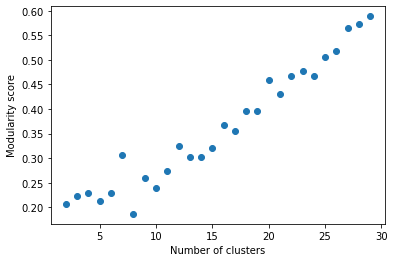

Link predictions: 0.05 :Accuracy: 0.56934888822415
Link predictions: 0.1 :Accuracy: 0.570361014630039
Link predictions: 0.2 :Accuracy: 0.5743043220840734
Link predictions: 0.3 :Accuracy: 0.577807848443843
Link predictions: 0.4 :Accuracy: 0.5865172087148721
Link predictions: 0.5 :Accuracy: 0.5803334596438045
Link predictions: 0.6 :Accuracy: 0.5687899597442576
Link predictions: 0.7 :Accuracy: 0.5781496684559521
Link predictions: 0.8 :Accuracy: 0.5828598484848485
For p value as  {1}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.6697746697746698}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.7063166529942576}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.7297047970479705}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.7521097046413502}
-------------------
Training clas

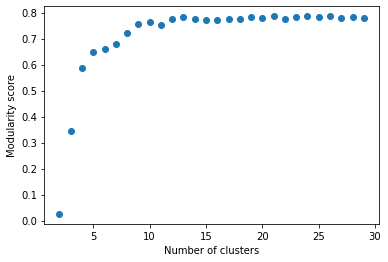

Link predictions: 0.05 :Accuracy: 0.5930800678033702
Link predictions: 0.1 :Accuracy: 0.5835175244711083
Link predictions: 0.2 :Accuracy: 0.5836589698046181
Link predictions: 0.3 :Accuracy: 0.5867388362652233
Link predictions: 0.4 :Accuracy: 0.5939374802652352
Link predictions: 0.5 :Accuracy: 0.5848806366047745
Link predictions: 0.6 :Accuracy: 0.5825242718446602
Link predictions: 0.7 :Accuracy: 0.5910956741395642
Link predictions: 0.8 :Accuracy: 0.5909090909090909


In [7]:
for i in [0,0.2,0.5,0.8,1]:
    print("For p value as ", {i})
    walks_similar_walk = similarity_walk(G, walk_length=10, num_walks=80,p=i)
    embeddings_similar_walk = get_embedding(G,walks_similar_walk)
    node_classification(embeddings_similar_walk, labelfile)
    cluster_eval(G1, embeddings_similar_walk)
    makeLinkPredictionData(G1, embeddings_similar_walk)

## Explain your observations for different values of p. For example, should we expect better accuracy with a small number of long-distance similarity walks?

As p increases, accuracy tends to improve due to the incorporation of long-distance similarity walks, but beyond a certain threshold, diminishing returns or decreased accuracy may occur due to the loss of local structure in the network.